<a href="https://colab.research.google.com/github/Juman7/Mathlab-project/blob/main/house_price_predict_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

house price prediction--- project 3

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
boston_dataset= pd.read_csv('/content/HousingData.csv')

In [3]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
boston_dataset.shape

(506, 14)

 check for missing values

In [8]:
#counting the null values
boston_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
ISTAT      20
PRICE       0
dtype: int64

In [10]:
#check total null values
boston_dataset.isnull().sum().sum()


120

In [17]:
#counting the null value percentage
boston_dataset.isnull().sum()/boston_dataset.shape[0]*100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
ISTAT      3.952569
PRICE      0.000000
dtype: float64

In [22]:
#filling the null datas with 0
boston_data= boston_dataset.fillna(value=0)

In [24]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
ISTAT      0
PRICE      0
dtype: int64

In [25]:
# statistical measures of the data set
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469112,10.768775,10.645889,0.067194,0.554695,6.284634,65.810277,3.795043,9.549407,408.237154,18.455534,356.674032,12.212846,22.532806
std,8.574755,23.025124,7.039321,0.250605,0.115878,0.702617,30.520606,2.105710,8.707259,168.537116,2.164946,91.294864,7.438324,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,187.000000,12.600000,0.320000,0.000000,5.000000
25%,0.068907,0.000000,4.877500,0.000000,0.449000,5.885500,40.425000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.224635,0.000000,8.560000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
#understanding the correlation between various features in the dataset
correlation= boston_data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,PRICE
CRIM,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120
ZN,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
INDUS,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371
CHAS,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
NOX,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
RM,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
AGE,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699
DIS,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
RAD,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
TAX,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


<Axes: >

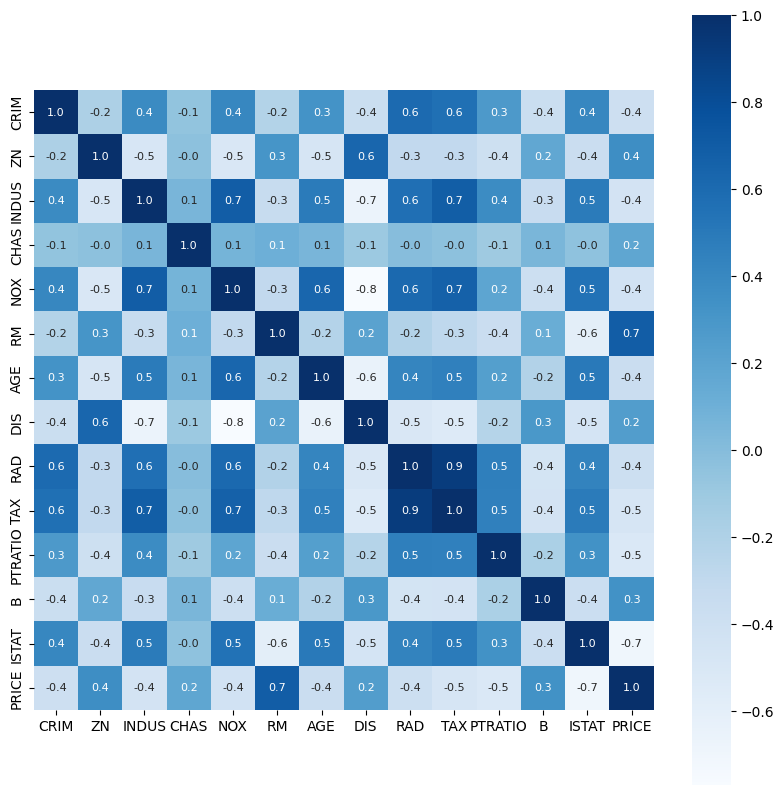

In [32]:
#constructing a hitmap to understand the corelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [34]:
#spliting the data and target
x= boston_data.drop(['PRICE'], axis=1)
y= boston_data['PRICE']

In [35]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  ISTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   0.00
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   0.00
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889 

In [36]:
#spliting the data into training data and test data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [39]:
print(x.shape,x_test.shape,x_test.shape)

(506, 13) (102, 13) (102, 13)


In [40]:
#model training
# XGBoost regressor model
# loading the model
model= XGBRegressor()
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
#evaluting our model
#prediction on training data
# accuracy for prediction on training data
training_data_predict= model.predict(x_train)
print(training_data_predict)

[23.173475  20.99347   20.101582  34.69607   13.889495  13.497748
 22.003567  15.180501  10.900543  22.69445   13.8005     5.5881104
 29.808315  49.998825  34.892097  20.601366  23.380234  19.211193
 32.69124   19.597088  26.978075   8.404611  46.00128   21.720982
 27.051828  19.35792   19.307768  24.798136  22.639374  31.7207
 18.550682   8.701801  17.401918  23.70115   13.296208  10.501085
 12.698788  25.00116   19.703587  14.911963  24.211182  25.019796
 14.907667  17.024925  15.59816   12.7065325 24.527735  15.016192
 49.99567   17.538628  21.181158  32.00295   15.605024  22.889355
 19.310612  18.725967  23.301453  37.202892  30.098835  33.117203
 20.99912   49.997765  13.399287   5.0047493 16.50629    8.410463
 28.66283   19.508207  20.59304   45.3985    39.79984   33.406467
 19.806564  33.400112  25.281658  49.994576  12.532008  17.437908
 18.606165  22.591307  49.99816   23.806684  23.308788  23.093765
 41.720097  16.140568  31.618176  36.064606   7.0092316 20.345657
 19.994242 

In [43]:
# R squared error : (for the classification problem we use accuracy score and for the regression problem we use many errors like-R square error, mean square error etc )
score_1= metrics.r2_score(y_train, training_data_predict)

#mean absolute error
score_2= metrics.mean_absolute_error(y_train, training_data_predict)

print('R square error :', score_1)
print('Mean absolute error:', score_2)

R square error : 0.9999947478417182
Mean absolute error: 0.014251818751344575


Visualizing the actual prices and predict prices

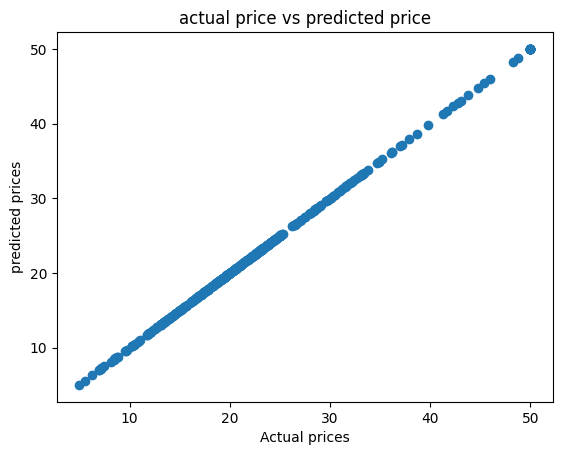

In [46]:
plt.scatter(y_train, training_data_predict)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.title('actual price vs predicted price')
plt.show()

In [44]:
#prediction on test data
#accuracy on prediction on test data
test_data_predict= model.predict(x_test)

In [45]:
# R squared error : (for the classification problem we use accuracy score and for the regression problem we use many errors like-R square error, mean square error etc )
score_1= metrics.r2_score(y_test, test_data_predict)

#mean absolute error
score_2= metrics.mean_absolute_error(y_test, test_data_predict)

print('R square error :', score_1)
print('Mean absolute error:', score_2)

R square error : 0.7642949179601621
Mean absolute error: 2.465959624683155


In [48]:
#making predictive system
input_data= (0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)

[18.923567]
